In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, concatenate, GlobalAveragePooling2D, Dense, MaxPooling2D
from keras.optimizers import Adam
import keras.backend as K

2023-12-12 13:19:08.018280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 13:19:10.524759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 151.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 164.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 148.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 156.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 131.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.22.0 requires urllib3<2.0, but you have urllib3 2.1.0 which is incompatible.
tensorflow 2.13.0

In [3]:
import tensorflow as tf
import os
import shutil
import random
import pandas as pd

# 定义文件夹路径
dataset_path = "Rice_Image_Dataset"  # 替换成您的数据集路径
dataset_name = "Rice_Image_Dataset"  # 数据集名称
# 定义类别和比例
classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
train_frac = 0.7
val_frac = 0.15
test_frac = 0.15
# 创建训练集、验证集和测试集文件夹
os.makedirs(os.path.join(dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test'), exist_ok=True)

In [4]:
# Creating subfolders for each category in the train and test folders
for PlantVillage in classes:
    os.makedirs(os.path.join(dataset_path, 'train', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'test', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'val', PlantVillage), exist_ok=True)

In [5]:
# 创建一个空的 DataFrame
df = pd.DataFrame(columns=['class', 'trainset', 'testset','valset'])

print('{:^18} {:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数','验证集数据个数'))

for rice in classes: # 遍历每个类别
    dataset_path2 = "Rice_Image_Dataset" 
    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, rice)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱

    # 划分训练集和测试集
    testset_number = int(len(images_filename) * test_frac) 
    valset_number = int(len(images_filename) * val_frac)
    train_number = int(len(images_filename) * train_frac)


    testset_images = images_filename[:testset_number]
    valset_images = images_filename[testset_number:testset_number + valset_number]
    trainset_images = images_filename[testset_number + valset_number: testset_number + valset_number + train_number]


    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, rice, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'test', rice, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, rice, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', rice, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    # 移动图像至 val 目录
    for image in valset_images:
        old_img_path = os.path.join(dataset_path, rice, image)           # 获取原始文件路径
        new_val_path = os.path.join(dataset_path, 'val', rice, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_val_path) # 移动文件
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    shutil.rmtree(old_dir) # 删除文件夹
    
    # 工整地输出每一类别的数据个数
    print('{:^18} {:^18} {:^18} {:^18}'.format(rice, len(trainset_images), len(testset_images),len(valset_images)))
    
    # 保存到表格中
    df = pd.concat([
    df,
    pd.DataFrame({
        'class': [rice],
        'trainset': [len(trainset_images)],
        'testset': [len(testset_images)],
        'valset': [len(valset_images)]
      })
], ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset'] + df['valset']
df.to_csv('数据量统计.csv', index=False)

        类别              训练集数据个数            测试集数据个数            验证集数据个数      
     Arborio             10500               2250               2250       
     Basmati             10500               2250               2250       
      Ipsala             10500               2250               2250       
     Jasmine             10500               2250               2250       
    Karacadag            10500               2250               2250       


In [6]:
df

,class,trainset,testset,valset,total
0,Arborio,10500,2250,2250,15000
1,Basmati,10500,2250,2250,15000
2,Ipsala,10500,2250,2250,15000
3,Jasmine,10500,2250,2250,15000
4,Karacadag,10500,2250,2250,15000


In [16]:
dataset_dir = 'Rice_Image_Dataset_split'

In [17]:
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [19]:
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle = False
)

Found 42000 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [21]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [22]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, multiply, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.optimizers import Adam
def se_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]  # 获取输入特征图的通道数
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(channels // ratio, activation='relu')(se)
    se = Dense(channels, activation='sigmoid')(se)
    se = Reshape((1, 1, channels))(se)
    return Multiply()([input_tensor, se])

# 创建带有SE模块的卷积神经网络模型
input_shape = (128, 128, 3)
inputs = tf.keras.Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = se_block(x)  # 添加SE模块
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = se_block(x)  # 添加SE模块
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = se_block(x)  # 添加SE模块
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs1 = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs1)
# Compile model with specific learning rate

# 打印模型摘要
model.summary()
# Compile the model
import keras.backend as K

# 自定义损失函数
def custom_categorical_crossentropy(y_true, y_pred):
    # 定义自定义的分类交叉熵损失函数
    epsilon = 1e-9  # 添加一个很小的数值以避免log(0)情况
    y_pred = K.clip(y_pred, epsilon, 1 - epsilon)  # 将预测值限制在一个较小的范围内，避免log(0)情况
    loss = -K.mean(y_true * K.log(y_pred))  # 计算损失
    return loss
def custom_accuracy(y_true, y_pred):
    predicted_labels = tf.argmax(y_pred, axis=1)
    true_labels = tf.argmax(y_true, axis=1)
    
    # Check equality between predicted and true labels and calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    return accuracy
opt = Adam(learning_rate=0.001)
# 使用自定义损失函数编译模型
model.compile(optimizer=opt, loss=custom_categorical_crossentropy, metrics=custom_accuracy)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 126, 126, 32)         896       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)           0         ['conv2d_4[0][0]']            
 g2D)                                                                                             
                                                                                                  
 global_average_pooling2d_2  (None, 32)                   0         ['max_pooling2d_2[0][0]'] 

In [32]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator,verbose=2)

Epoch 1/30
2625/2625 - 176s - loss: 0.1099 - custom_accuracy: 0.7740 - val_loss: 0.0788 - val_custom_accuracy: 0.8286 - 176s/epoch - 67ms/step
Epoch 2/30
2625/2625 - 193s - loss: 0.0455 - custom_accuracy: 0.9191 - val_loss: 0.0411 - val_custom_accuracy: 0.9378 - 193s/epoch - 73ms/step
Epoch 3/30
2625/2625 - 176s - loss: 0.0293 - custom_accuracy: 0.9498 - val_loss: 0.0560 - val_custom_accuracy: 0.9108 - 176s/epoch - 67ms/step
Epoch 4/30
2625/2625 - 181s - loss: 0.0245 - custom_accuracy: 0.9601 - val_loss: 0.2791 - val_custom_accuracy: 0.6805 - 181s/epoch - 69ms/step
Epoch 5/30
2625/2625 - 164s - loss: 0.0206 - custom_accuracy: 0.9669 - val_loss: 0.0326 - val_custom_accuracy: 0.9455 - 164s/epoch - 63ms/step
Epoch 6/30
2625/2625 - 169s - loss: 0.0191 - custom_accuracy: 0.9698 - val_loss: 1.0250 - val_custom_accuracy: 0.4570 - 169s/epoch - 65ms/step
Epoch 7/30
2625/2625 - 194s - loss: 0.0171 - custom_accuracy: 0.9726 - val_loss: 0.0990 - val_custom_accuracy: 0.8959 - 194s/epoch - 74ms/step

In [37]:
test_loss_ensemble, test_acc_ensemble = model.evaluate(test_generator)

704/704 [==============================] - 10s 14ms/step - loss: 0.0121 - custom_accuracy: 0.9854


In [34]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [35]:
from tensorflow.keras.optimizers import Adam
def attention_block(input_tensor):
    # 定义注意力机制块
    channels = input_tensor.shape[-1]  # 获取输入特征图的通道数

    # 注意力机制
    attention_probs = GlobalAveragePooling2D()(input_tensor)
    attention_probs = Dense(channels // 2, activation='relu')(attention_probs)
    attention_probs = Dense(channels, activation='sigmoid')(attention_probs)
    attention_probs = Reshape((1, 1, channels))(attention_probs)
    attention_mul = multiply([input_tensor, attention_probs])

    return attention_mul

# 图像尺寸和通道数
height = 128
width = 128
channels = 3  # 24位深度通常指RGB图像

input_shape = (height, width, channels)
num_classes = 5  # 数据集的类别数

inputs = Input(shape=input_shape)

conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
conv_2 = Conv2D(64, (3, 3), activation='relu')(conv_1)
maxpool_1 = MaxPooling2D(pool_size=(2, 2))(conv_2)

# 添加注意力机制块
attention_block_1 = attention_block(maxpool_1)

conv_3 = Conv2D(128, (3, 3), activation='relu')(attention_block_1)
maxpool_2 = MaxPooling2D(pool_size=(2, 2))(conv_3)

# 添加注意力机制块
attention_block_2 = attention_block(maxpool_2)

flatten = Flatten()(attention_block_2)
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.5)(dense_1)
outputs2 = Dense(5, activation='softmax')(dropout_1)

# 定义模型
model_1 = Model(inputs=inputs, outputs=outputs2)


# 打印模型摘要
model_1.summary()
# Compile the model
import keras.backend as K

# 自定义损失函数
def custom_categorical_crossentropy(y_true, y_pred):
    # 定义自定义的分类交叉熵损失函数
    epsilon = 1e-9  # 添加一个很小的数值以避免log(0)情况
    y_pred = K.clip(y_pred, epsilon, 1 - epsilon)  # 将预测值限制在一个较小的范围内，避免log(0)情况
    loss = -K.mean(y_true * K.log(y_pred))  # 计算损失
    return loss
def custom_accuracy(y_true, y_pred):
    predicted_labels = tf.argmax(y_pred, axis=1)
    true_labels = tf.argmax(y_true, axis=1)
    
    # Check equality between predicted and true labels and calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    return accuracy
opt = Adam(learning_rate=0.001)
# 使用自定义损失函数编译模型
model_1.compile(optimizer=opt, loss=custom_categorical_crossentropy, metrics=custom_accuracy)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 126, 126, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 124, 124, 64)         18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                                       

In [36]:
history = model_1.fit(train_generator, epochs=30, validation_data=validation_generator,verbose=2)

Epoch 1/30
2625/2625 - 176s - loss: 0.0997 - custom_accuracy: 0.8010 - val_loss: 0.0638 - val_custom_accuracy: 0.8750 - 176s/epoch - 67ms/step
Epoch 2/30
2625/2625 - 167s - loss: 0.0386 - custom_accuracy: 0.9364 - val_loss: 0.0232 - val_custom_accuracy: 0.9664 - 167s/epoch - 64ms/step
Epoch 3/30
2625/2625 - 169s - loss: 0.0304 - custom_accuracy: 0.9495 - val_loss: 0.0087 - val_custom_accuracy: 0.9890 - 169s/epoch - 64ms/step
Epoch 4/30
2625/2625 - 164s - loss: 0.0291 - custom_accuracy: 0.9515 - val_loss: 0.1460 - val_custom_accuracy: 0.8837 - 164s/epoch - 62ms/step
Epoch 5/30
2625/2625 - 166s - loss: 0.0235 - custom_accuracy: 0.9618 - val_loss: 0.0196 - val_custom_accuracy: 0.9744 - 166s/epoch - 63ms/step
Epoch 6/30
2625/2625 - 178s - loss: 0.0231 - custom_accuracy: 0.9637 - val_loss: 0.3770 - val_custom_accuracy: 0.7741 - 178s/epoch - 68ms/step
Epoch 7/30
2625/2625 - 165s - loss: 0.0208 - custom_accuracy: 0.9659 - val_loss: 0.1008 - val_custom_accuracy: 0.9244 - 165s/epoch - 63ms/step

In [31]:
test_loss_ensemble, test_acc_ensemble = model_1.evaluate(test_generator)

704/704 [==============================] - 10s 14ms/step - loss: 0.0300 - custom_accuracy: 0.9602


In [20]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
x_val,y_val = validation_generator.next()

In [21]:
from tensorflow.keras.layers import concatenate
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, multiply, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.optimizers import Adam
def custom_categorical_crossentropy(y_true, y_pred):
    epsilon = 1e-9
    y_pred = K.clip(y_pred, epsilon, 1 - epsilon)
    loss = -K.mean(y_true * K.log(y_pred))
    return loss

def custom_accuracy(y_true, y_pred):
    predicted_labels = tf.argmax(y_pred, axis=1)
    true_labels = tf.argmax(y_true, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    return accuracy
# 第一个模型
def first_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = se_block(x)  # 添加SE模块
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = se_block(x)  # 添加SE模块
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = se_block(x)  # 添加SE模块
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(5, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss=custom_categorical_crossentropy, metrics=custom_accuracy)
    
    return model

# 第二个模型
def second_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(conv_1)
    maxpool_1 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    
    attention_block_1 = attention_block(maxpool_1)
    
    conv_3 = Conv2D(128, (3, 3), activation='relu')(attention_block_1)
    maxpool_2 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    
    attention_block_2 = attention_block(maxpool_2)
    
    flatten = Flatten()(attention_block_2)
    dense_1 = Dense(256, activation='relu')(flatten)
    dropout_1 = Dropout(0.5)(dense_1)
    outputs = Dense(5, activation='softmax')(dropout_1)
    
    model_1 = Model(inputs=inputs, outputs=outputs)
    
    opt = Adam(learning_rate=0.001)
    model_1.compile(optimizer=opt, loss=custom_categorical_crossentropy, metrics=custom_accuracy)
    return model_1

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Dense, Dropout, Flatten, Lambda
from tensorflow.keras.optimizers import Adam

# Assuming you have defined 'first_model()' and 'second_model()' somewhere

# Instantiate two models
model = first_model()
model_1 = second_model()

# Specify input shape
input_shape = (128, 128, 3)
inputs = Input(shape=input_shape)

# Obtain outputs from the first and second models
output_1 = model(inputs)
output_2 = model_1(inputs)

# Concatenate the outputs
merged_outputs = concatenate([output_1, output_2])
# Add layers as needed
x = Dense(100, activation='relu')(merged_outputs)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
# Define the final ensemble output layer (assuming 5 classes for softmax)
ensemble_output = Dense(5, activation='softmax')(x)

# Define custom loss and accuracy functions
def custom_categorical_crossentropy(y_true, y_pred):
    epsilon = 1e-9
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    # Compute cross-entropy without multiplying by y_true (it's not broadcastable)
    loss = -tf.reduce_mean(y_true * tf.math.log(y_pred), axis=-1)
    return loss


def custom_accuracy(y_true, y_pred):
    predicted_labels = tf.argmax(y_pred, axis=1)
    true_labels = tf.argmax(y_true, axis=1)
    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    return accuracy

opt = Adam(learning_rate=0.001)

# Create the ensemble model
ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

# Compile the model
ensemble_model.compile(optimizer=opt, loss=custom_categorical_crossentropy, metrics=[custom_accuracy])

# Display the model summary
ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 model_2 (Functional)        (None, 5)                    1307435   ['input_5[0][0]']             
                                                          5                                       
                                                                                                  
 model_3 (Functional)        (None, 5)                    2960675   ['input_5[0][0]']             
                                                          7                                       
                                                                                            

In [23]:
# Assuming 'train_generator' and 'validation_generator' are defined for training/validation data
history = ensemble_model.fit(train_generator, epochs=30, validation_data=validation_generator, verbose=2)

Epoch 1/30
2625/2625 - 157s - loss: 0.2020 - custom_accuracy: 0.5460 - val_loss: 0.1490 - val_custom_accuracy: 0.6884 - 157s/epoch - 60ms/step
Epoch 2/30
2625/2625 - 145s - loss: 0.0955 - custom_accuracy: 0.8273 - val_loss: 0.0593 - val_custom_accuracy: 0.8991 - 145s/epoch - 55ms/step
Epoch 3/30
2625/2625 - 153s - loss: 0.0717 - custom_accuracy: 0.8786 - val_loss: 0.1580 - val_custom_accuracy: 0.7494 - 153s/epoch - 58ms/step
Epoch 4/30
2625/2625 - 150s - loss: 0.0555 - custom_accuracy: 0.9115 - val_loss: 0.1192 - val_custom_accuracy: 0.8584 - 150s/epoch - 57ms/step
Epoch 5/30
2625/2625 - 148s - loss: 0.0404 - custom_accuracy: 0.9416 - val_loss: 0.0784 - val_custom_accuracy: 0.9086 - 148s/epoch - 57ms/step
Epoch 6/30
2625/2625 - 138s - loss: 0.0349 - custom_accuracy: 0.9508 - val_loss: 0.0947 - val_custom_accuracy: 0.8999 - 138s/epoch - 53ms/step
Epoch 7/30
2625/2625 - 140s - loss: 0.0332 - custom_accuracy: 0.9525 - val_loss: 0.0183 - val_custom_accuracy: 0.9707 - 140s/epoch - 53ms/step

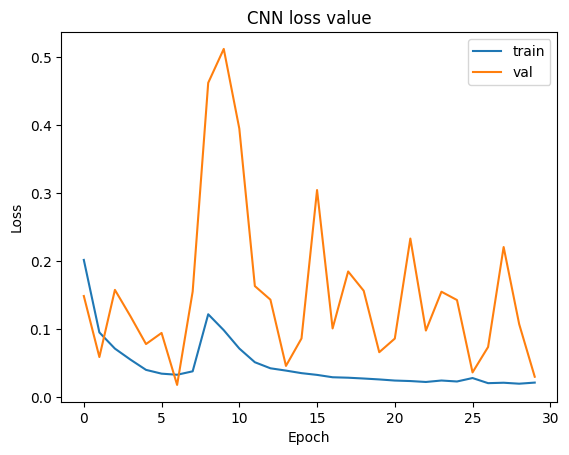

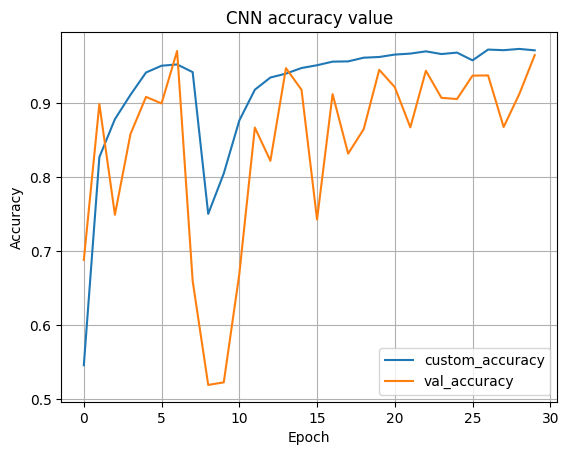

In [24]:
import matplotlib.pyplot as plt
# 绘制loss图
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("CNN loss value")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.grid(True)



# 绘制准确率
plt.plot(history.history['custom_accuracy'], label='custom_accuracy')
plt.plot(history.history['val_custom_accuracy'], label='val_accuracy')
plt.title("CNN accuracy value")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print("Test accuracy:", test_acc)

704/704 [==============================] - 9s 12ms/step - loss: 0.0271 - custom_accuracy: 0.9660
Test accuracy: 0.9659978747367859


704/704 [==============================] - 8s 11ms/step


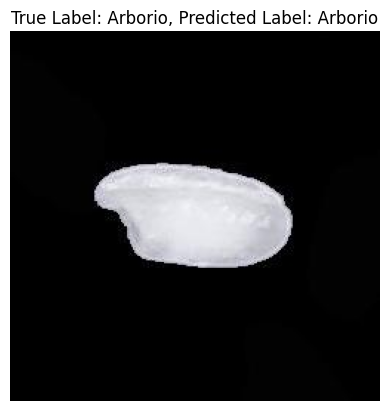

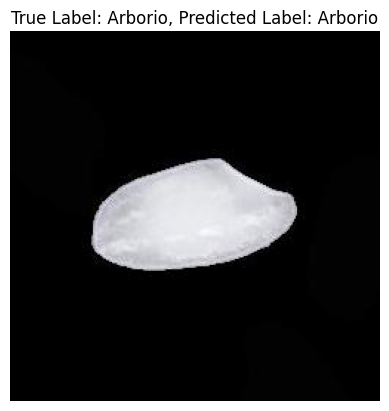

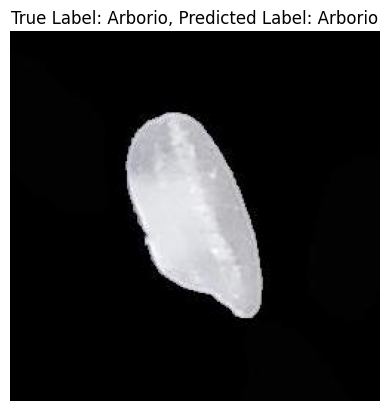

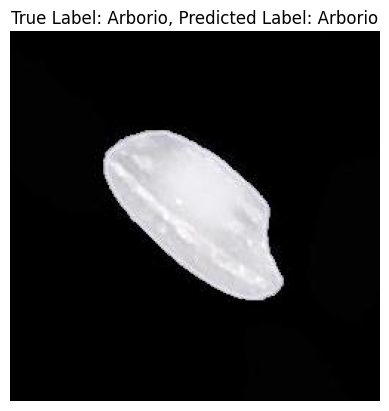

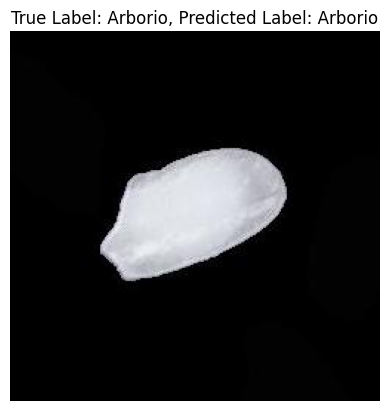

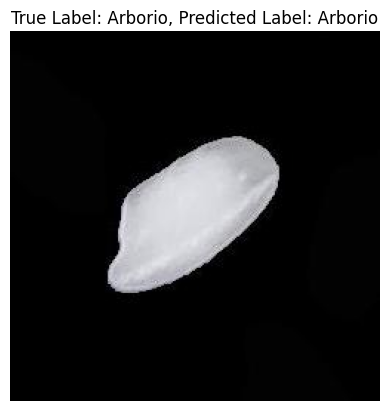

In [27]:
import numpy as np

predictions = ensemble_model.predict(test_generator)
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(6):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

704/704 [==============================] - 8s 12ms/step


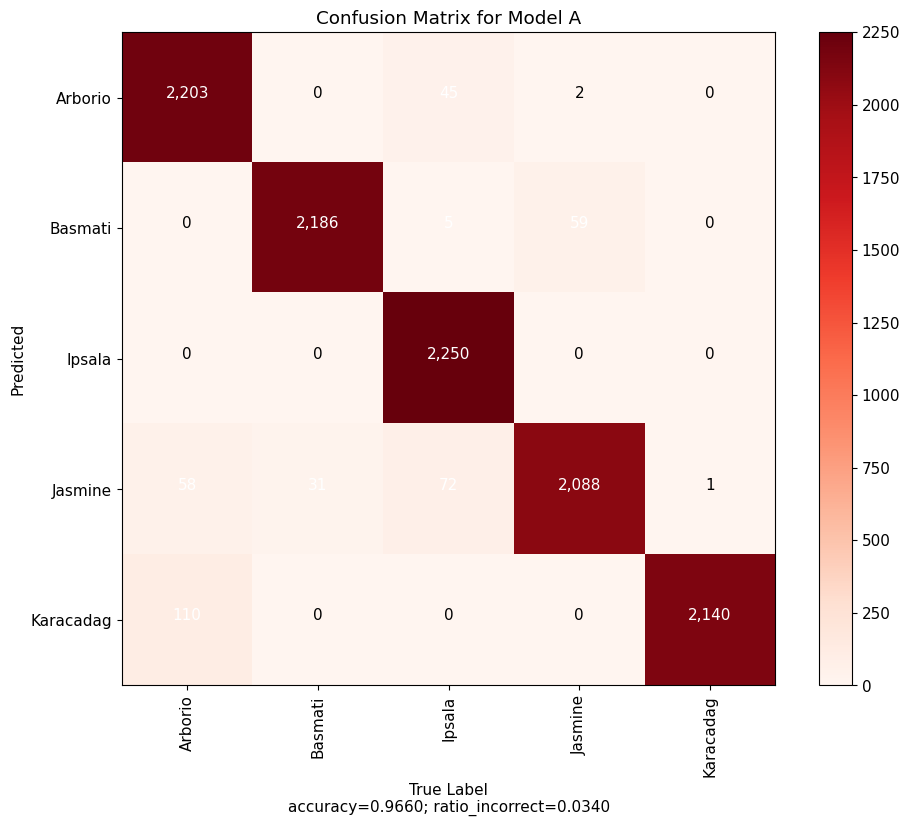

In [28]:
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(validation_generator, ensemble_model, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})
    
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)
    
    labels = validation_generator.classes
    
    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])
    
    cm = confusion_matrix(labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    # plt.grid(b=False)

    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

# 使用方式：
plot_confusion_matrix(validation_generator, ensemble_model, test_generator, 'Model A')

704/704 [==============================] - 10s 13ms/step


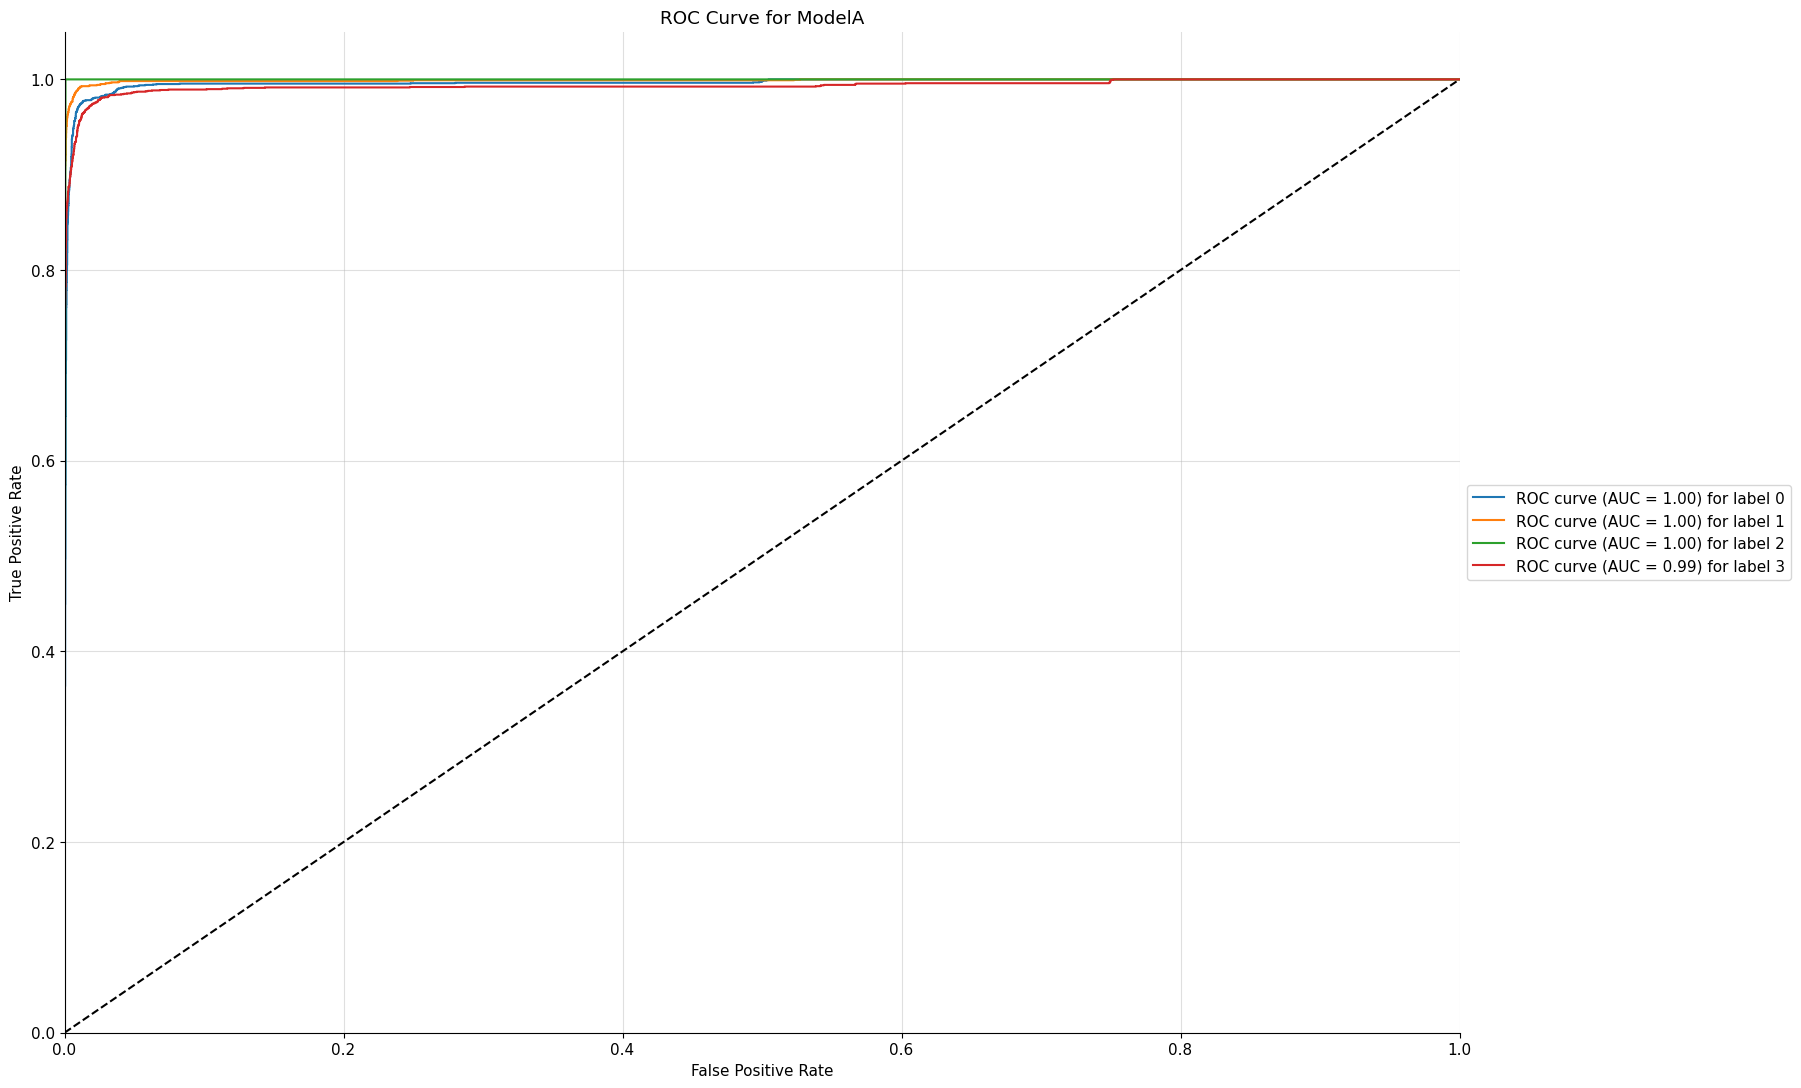

In [29]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(ensemble_model, test_generator, model_name):
    y_true = test_generator.classes
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(4):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(ensemble_model, test_generator, 'ModelA')

In [30]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, ensemble_model, test_generator):
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df
class_report(validation_generator, ensemble_model, test_generator)

704/704 [==============================] - 7s 10ms/step


,precision,recall,f1-score,support
Arborio,0.929144,0.979111,0.953473,2250.000000
Basmati,0.986017,0.971556,0.978733,2250.000000
Ipsala,0.948567,1.000000,0.973605,2250.000000
Jasmine,0.971615,0.928000,0.949307,2250.000000
Karacadag,0.999533,0.951111,0.974721,2250.000000
accuracy,0.965956,0.965956,0.965956,0.965956
macro avg,0.966975,0.965956,0.965968,11250.000000
weighted avg,0.966975,0.965956,0.965968,11250.000000


In [31]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(ensemble_model, test_generator):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 计算敏感性和特异性
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return sensitivity, specificity

# 使用方式：
sensitivity, specificity = sensitivity_specificity(ensemble_model, test_generator)
print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

704/704 [==============================] - 8s 12ms/step
Sensitivity: 1.0, Specificity: 1.0


704/704 [==============================] - 9s 12ms/step


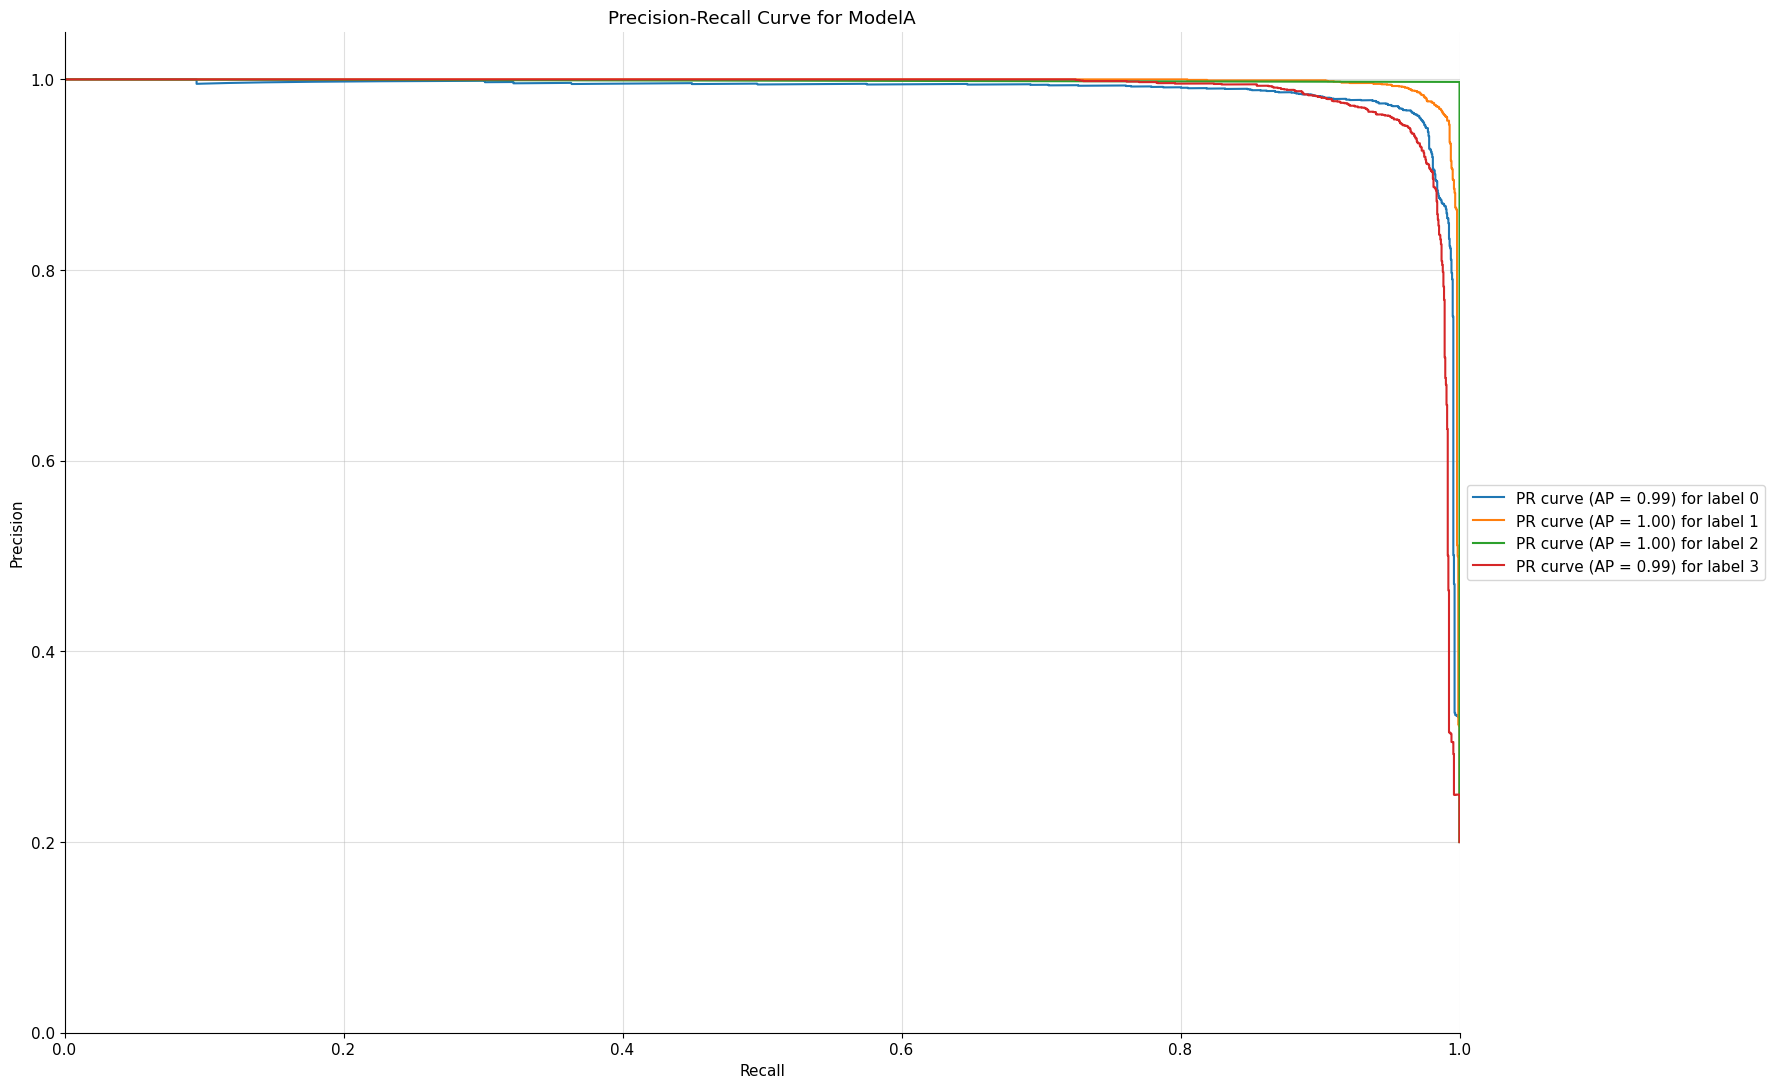

In [32]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(ensemble_model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)

    # 初始化 Precision 和 Recall 字典
    precision = dict()
    recall = dict()
    average_precision = dict()

    # 计算每个类别的 Precision 和 Recall
    for i in range(4):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # 绘制 Precision-Recall 曲线
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(4):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_precision_recall_curve(ensemble_model, test_generator, 'ModelA')

In [ ]:
ensemble_model.save('rice_model.h1')